In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Remove the first column: Customer ID
df.drop('CustomerID',axis=1,inplace=True)

In [4]:
# Lets see the new dataset after the removel of the first column
df.head()
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [5]:
for i in range(len(df['Gender'])):
    df.loc[i,'Gender'] = 1 if (df.loc[i,'Gender'] == 'Male') else 0
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [6]:
df_knn = StandardScaler().fit_transform(df)

In [7]:
pca = PCA(n_components=2) 
df_knn = pca.fit_transform(df)

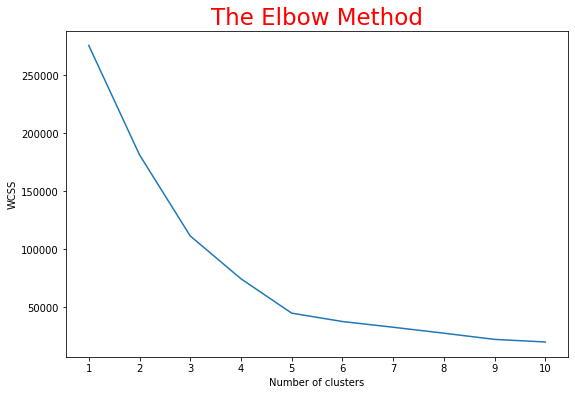

In [8]:
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(df_knn)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method', color='red',fontsize='23')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(df_knn)

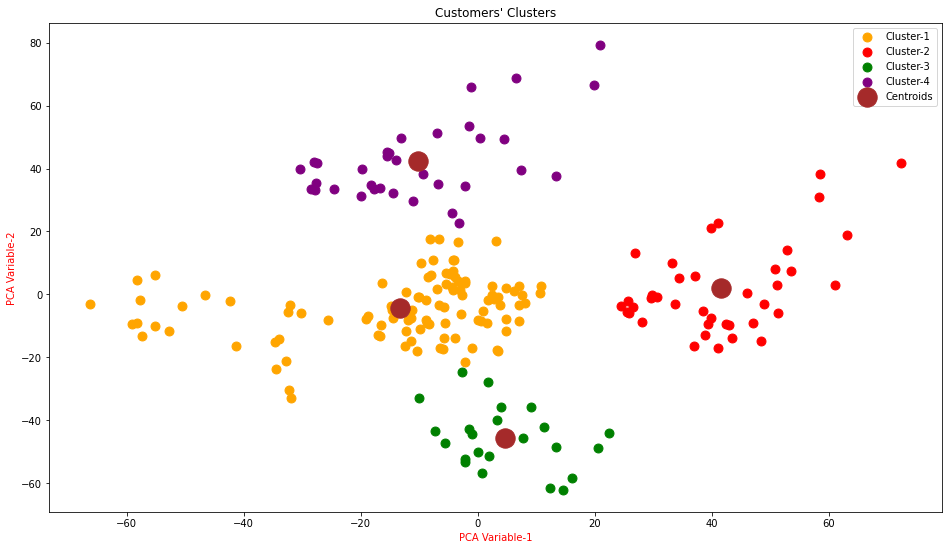

In [10]:
plt.figure(1 , figsize = (16 ,9))
plt.scatter(df_knn[y_kmeans == 0, 0], df_knn[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(df_knn[y_kmeans == 1, 0], df_knn[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(df_knn[y_kmeans == 2, 0], df_knn[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(df_knn[y_kmeans == 3, 0], df_knn[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()


In [11]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(df_knn)

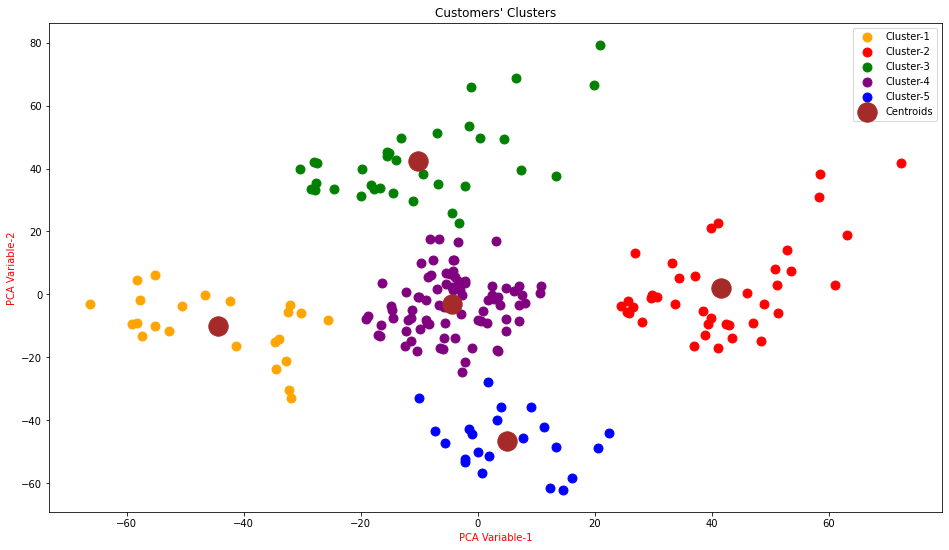

In [12]:
plt.figure(1 , figsize = (16 ,9))
plt.scatter(df_knn[y_kmeans == 0, 0], df_knn[y_kmeans == 0, 1], s = 80, c = 'orange', label = 'Cluster-1')
plt.scatter(df_knn[y_kmeans == 1, 0], df_knn[y_kmeans == 1, 1], s = 80, c = 'red', label = 'Cluster-2')
plt.scatter(df_knn[y_kmeans == 2, 0], df_knn[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')
plt.scatter(df_knn[y_kmeans == 3, 0], df_knn[y_kmeans == 3, 1], s = 80, c = 'purple', label = 'Cluster-4')
plt.scatter(df_knn[y_kmeans == 4, 0], df_knn[y_kmeans == 4, 1], s = 80, c = 'blue', label = 'Cluster-5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 375, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('PCA Variable-1', color='red')
plt.ylabel('PCA Variable-2', color='red')
plt.legend()
plt.show()

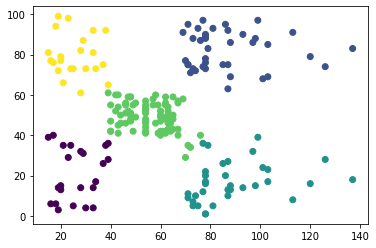

In [13]:
knn_cluster = pd.DataFrame(data = y_kmeans)
df['knn_cluster'] = knn_cluster
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = 'knn_cluster')

In [14]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


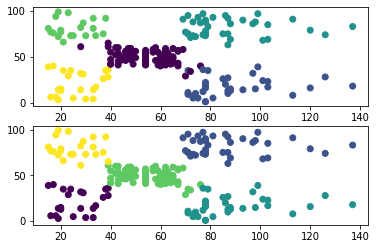

In [15]:
hc_cluster = pd.DataFrame(data = hc_labels)
df['hc_cluster'] = hc_cluster
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = 'hc_cluster')
ax2.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = 'knn_cluster')
plt.show()
